# German Credit Risk Dataset Analysis 

Ved Kulkarni

## 1. Introduction

I was interested in conducting a data analysis project on this dataset as it could help me develop skills in financial analytics.

Research Question: What is the relationship between the type of housing (own, rent, or free) and the credit amount requested by the applicants in the German Credit Data?"


Why is this important: Understanding how housing status affects the amount of credit requested can reveal different risk levels among borrowers. For example, people who own their homes may have different financial needs compared to those who rent or live in free housing. This information helps banks create better credit scoring models and design loan products that fit each group. It also helps prevent loan defaults by identifying potential risks early. Overall, this understanding supports better decision-making and financial stability.

In [103]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set() 

In [104]:
df = pd.read_csv("german_credit_data.csv")
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [105]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


## 2. Dataset Discussion

The dataset used in this analysis is the German Credit Data, accessed from Kaggle on September 24, 2024. It is available at Kaggle: German Credit Data (https://www.kaggle.com/datasets/uciml/german-credit). The dataset does not have an accompanying codebook, but it contains information on various financial and personal attributes of credit applicants, which is useful for credit risk analysis. The data was originally collected from German credit applicants and includes details about their personal characteristics, credit amount, loan purpose, and financial status. It is commonly used for classification tasks in credit scoring research and education. The dataset consists of 1000 rows and 10 columns. Each row represents an individual applicant’s credit record. Below are 6 sample observations from the dataset. The unit of observation is an individual credit applicant. Each row in the dataset corresponds to one applicant's credit request and their associated attributes, such as age, housing status, and credit amount requested. For this analysis, I have selected two variables of interest: Quantitative Variable: Credit amount – the amount of credit requested by the applicant. Categorical Variable: Housing – the housing status of the applicant, which includes categories like own, rent, and free. One limitation of the dataset is the absence of critical financial variables like income, employment status, and credit history length, which are essential for a more accurate assessment of credit risk. Additionally, ethical considerations must be taken into account when using personal financial data to ensure privacy and avoid discrimination in credit scoring. Including variables like income and employment stability could significantly enhance the predictive power of this dataset.



In [106]:
df.head(6)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education


## 3. Dataset Cleaning

Checking for missing values:

In [107]:
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [108]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [109]:
df['Credit amount'].unique()

array([ 1169,  5951,  2096,  7882,  4870,  9055,  2835,  6948,  3059,
        5234,  1295,  4308,  1567,  1199,  1403,  1282,  2424,  8072,
       12579,  3430,  2134,  2647,  2241,  1804,  2069,  1374,   426,
         409,  2415,  6836,  1913,  4020,  5866,  1264,  1474,  4746,
        6110,  2100,  1225,   458,  2333,  1158,  6204,  6187,  6143,
        1393,  2299,  1352,  7228,  2073,  5965,  1262,  3378,  2225,
         783,  6468,  9566,  1961,  6229,  1391,  1537,  1953, 14421,
        3181,  5190,  2171,  1007,  1819,  2394,  8133,   730,  1164,
        5954,  1977,  1526,  3965,  4771,  9436,  3832,  5943,  1213,
        1568,  1755,  2315,  1412, 12612,  2249,  1108,   618,  1409,
         797,  3617,  1318, 15945,  2012,  2622,  2337,  7057,  1469,
        2323,   932,  1919,  2445, 11938,  6458,  6078,  7721,  1410,
        1449,   392,  6260,  7855,  1680,  3578,  7174,  2132,  4281,
        2366,  1835,  3868,  1768,   781,  1924,  2121,   701,   639,
        1860,  3499,

In [110]:
df['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

The variables of interest are Housing and Credit Amount. Both of these variables do not have missing values, and all the values with .unique seem reasonable. The only variables with automatically detected missing values are Savings accounts and checking accounts. However, since these are not our variables of interest, there is no reason to drop these rows as it may show bias/negatively our dataset analysis. Dropping them would significantly reduce the dataset size (by 394 observations), which could impact the analysis.


Checking for unique values:

In [111]:
df['Age'].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59])

In [112]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [113]:
df['Job'].unique()

array([2, 1, 3, 0])

In [114]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [115]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [116]:
df['Duration'].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40])

In [117]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [118]:
df['Checking account']

0        little
1      moderate
2           NaN
3        little
4        little
         ...   
995         NaN
996      little
997         NaN
998      little
999    moderate
Name: Checking account, Length: 1000, dtype: object

In [119]:
df['Sex'].value_counts()


Sex
male      690
female    310
Name: count, dtype: int64

In [120]:
df['Housing'].value_counts()


Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [121]:
df['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [122]:
df['Purpose'].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

The categories like repairs, domestic appliances, and vacation/others are considered uncommon in the Purpose variable because they each represent less than 5% of the total observations, making them statistically insignificant on their own. This low frequency means there just isn’t enough data to draw out some reliable conclusions about these categories individually. Therefore, grouping them into a broader category like other increases the sample size and creates a more balanced representation, and in turn improves the reliability and clarity of the analysis.

In [123]:
uncommon_categories = ['repairs', 'domestic appliances', 'vacation/others']
df['Purpose'] = df['Purpose'].replace(uncommon_categories, 'other')


In [124]:
df['Purpose'].value_counts()

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
other                   46
Name: count, dtype: int64

<Axes: >

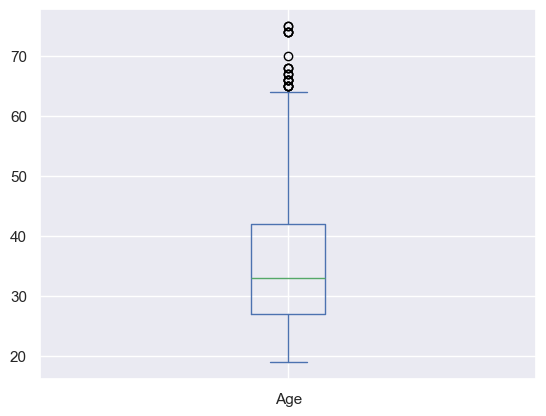

In [125]:
df.Age.plot.box()

In [126]:
df['Age'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

Distribution Observation for Age:
The distribution is fairly normal, with most applicants between 20 and 60 years old. The upper and lower extremes—applicants under 20 or over 70 years—might be considered outliers because they represent relatively uncommon age groups for credit applicants.I chose not to remove these outliers because they may represent legitimate applicants with specific financial needs. For example, younger applicants might be students, and older applicants may have retirement-related financial needs. Removing them could lead to biased results, excluding potentially important applicant profiles that may differ significantly from the average.

<Axes: >

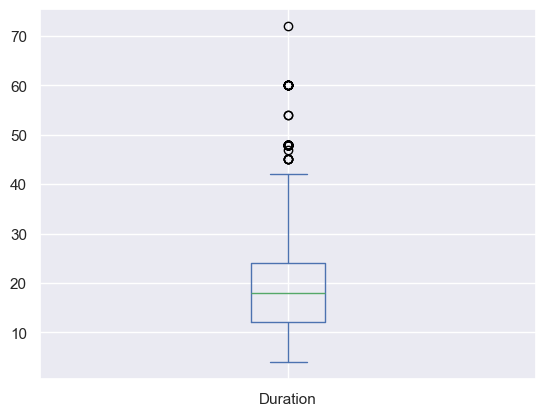

In [127]:
df['Duration'].plot.box()

In [128]:
df['Duration'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration, dtype: float64

Distribution Observation for Duration: The Duration variable ranges from 4 to 72 months, with most values clustered between 12 and 36 months.A few observations extend to 60 or more months, which are less common in this dataset. I decided to keep these outliers because they might reflect different types of credit products or borrower preferences that are important for understanding the full spectrum of loan behaviors.

<Axes: >

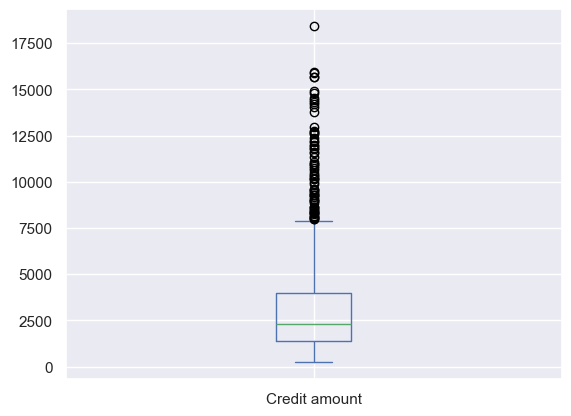

In [129]:
df['Credit amount'].plot.box()

In [130]:
df['Credit amount'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit amount, dtype: float64

Distribution Observation for Credit Amount: The Credit amount variable has a wide range, from 250 to 18,424, with most values concentrated below 5,000. Many outliers are above the the 7500 mark, which is significantly higher than the typical range of credit amounts requested. I chose to retain these outliers because they may represent legitimate cases, such as applicants requesting large loans for business or high-value purchases. Removing them would ignore these specific segments and could bias the results by focusing only on lower-value loans.

Additinal Data Cleaning Needs:

Data Type Conversion:
Issue: Some columns were not in the correct data type, such as Unnamed: 0, which is an identifier and should not be treated as a numerical variable.
Action Taken: I did not use this column in the analysis since it does not provide meaningful information and is only an index.
Reason: Ignoring this column avoids unnecessary noise in the data and keeps the focus on relevant variables.

## 4. Summarizing Data
Research Question: "What is the relationship between the Housing status (own, rent, free) and the Credit amount requested by applicants in the German Credit Data?"

In [131]:
pd.crosstab(df['Credit amount'], df['Housing'])

Housing,free,own,rent
Credit amount,,,
250,0,1,0
276,0,0,1
338,0,1,0
339,0,1,0
343,0,1,0
...,...,...,...
15653,0,1,0
15672,0,1,0
15857,0,1,0


Two Way Table Description:

General Pattern:
The table indicates that certain credit amounts are specific to particular housing categories, which may suggest different financial behaviors and needs based on housing status.

Overall, this two-way table provides a detailed view of how specific credit amounts are distributed across different housing categories, highlighting any concentration or uniqueness in the data.

Text(0.5, 1.0, 'Boxplot of Credit Amount by Housing Status')

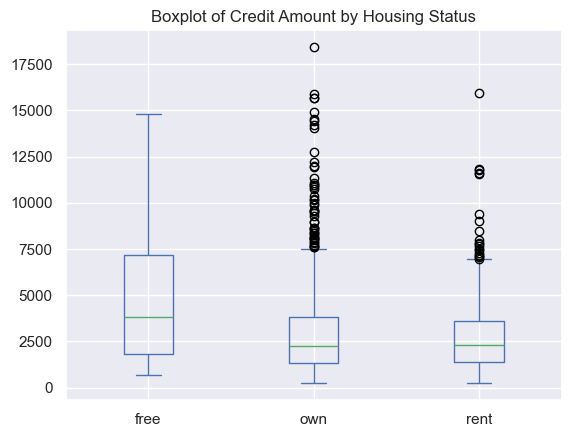

In [132]:
df.plot.box(column='Credit amount', by='Housing')
plt.title('Boxplot of Credit Amount by Housing Status')

Boxplot Description:

Free Housing:
The median credit amount is the highest among the categories, with a wide interquartile range (IQR) and some significant outliers.
This suggests that applicants in free housing have diverse credit needs, ranging from low to very high amounts.

Own and Rent Housing:
These categories show lower medians and narrower IQRs compared to free, with a few outliers in both.
The distributions are more concentrated, indicating more consistent credit requests.

Text(0.5, 1.0, 'Violin Plot of Credit Amount by Housing Status')

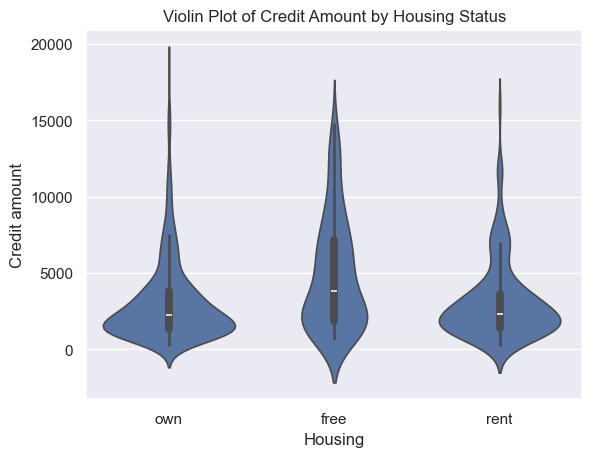

In [133]:
sns.violinplot(x='Housing', y='Credit amount', data = df)
plt.title('Violin Plot of Credit Amount by Housing Status')

Violin Plot Description:

Free Housing:
The violin plot shows a wide and bimodal distribution, with a higher concentration around two separate ranges of credit amounts.
This indicates that there are two distinct groups within this category: one requesting lower amounts and another requesting significantly higher amounts.

Own and Rent Housing:
The distributions are more symmetrical and concentrated, with peaks around lower credit amounts.
This suggests that most applicants in these categories have more predictable and moderate credit needs.

In [134]:
credit_summary_stats = df.groupby('Housing')['Credit amount'].agg(['mean', 'median', 'std']).reset_index()
credit_summary_stats

,Housing,mean,median,std
0,free,4906.212963,3800.5,3667.003819
1,own,3060.939691,2238.0,2659.576809
2,rent,3122.553073,2301.0,2553.519070


Applicants with free housing request, on average, higher credit amounts (mean: 4906) compared to those who own (mean: 3061) or rent (mean: 3123). This suggests that individuals in free housing may have different financial circumstances or needs that lead them to request higher loans.

Free housing could imply:

Living with Family or Friends: The individual may be living rent-free in a property owned by family members or friends.

Employer-Provided Housing: The individual could be living in accommodation provided by their employer as part of their compensation package.

Government or Social Housing: The person may have access to housing provided by the government or a charitable organization, often at little to no cost.

Own Property without Mortgage: The individual may own their home outright without any mortgage, so they do not have housing expenses in the form of rent or mortgage payments.


Overall analysis: The analysis demonstrates a clear relationship between housing status and the amount of credit requested. Applicants with free housing tend to request larger and more varied credit amounts, likely due to differing financial circumstances compared to those who rent or own their housing. Individuals with free housing often have increased disposable income and fewer financial obligations, allowing them to request higher loan amounts for major expenses or investments, as they are perceived as having a greater capacity to repay without the burden of rent or mortgage payments. This insight can be valuable for lenders to better understand the credit needs and risks associated with different housing statuses, allowing for more tailored financial products and risk management strategies.

## Conclusion:

I explored the relationship between housing status(free,own, rent) with the amount of credit requested in the German credit risk dataset. I wanted to explore the relationship to better understand how housing status affects the amount of credit requested can reveal different risk levels among borrowers. For example, people who own their homes may have different financial needs compared to those who rent or live in free housing. To continue I did not drop any missing values due to our variables of interest not having missing values. The only variables to have missing values(Saving account, Checking account) which I decided not to drop as it was apart of 394 of the 1000 observations therefore would bias the data. I noticed in the variable Purpose(Why they asked for the loan) that there were a couple of line items like repairs, domestic appliances, and vacation/others are considered uncommon in the Purpose variable because they each represent less than 5% of the total observations, making them statistically insignificant on their own. This low frequency means there just isn’t enough data to draw out some reliable conclusions about these categories individually. Therefore, grouping them into a broader category like other increases the sample size and creates a more balanced representation, and in turn improves the reliability and clarity of the analysis. One key limitation of this analysis is the absence of other relevant financial variables, such as income or employment status, which could provide additional insights into the ability to repay loans. Furthermore, while outliers were retained to maintain the dataset's integrity, they may have introduced some skewness, particularly for the free housing group. Another challenge was interpreting "free housing," as it encompasses various living situations that may influence financial behavior differently. These limitations suggest caution when making strong claims, as the results are based on housing status alone, without considering other critical financial factors. Future analyses could include additional variables such as income, employment status, or credit history to better understand the financial profiles of applicants. Research could also explore how other factors, like age or loan purpose, interact with housing status to influence credit amounts. Additionally, predictive modeling could be applied to assess the likelihood of loan approval or default based on housing status and other financial indicators. This would provide a more comprehensive view of credit risk and behavior across different applicant groups.

## Future Project
In the future, I could use this analysis to create a tool that uses predictive modelling to assess the likelihood of loan approval based on certain financial indicators.